<a href="https://colab.research.google.com/github/stanshi2016/pytorch_learning/blob/main/PyTorch%E5%9B%BE%E5%83%8F%E5%88%86%E7%B1%BB%E5%99%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch 
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
print(torch.__version__)

1.13.0+cu116


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
shuffle=True, num_workers=2)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
shuffle=False, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [7]:
classes=('plane', 'car', 'bird', 'cat','beer', 'dog','frog', 'horse', 'ship', 'truck')

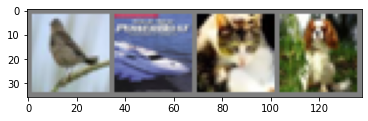

 bird  ship   cat   dog


In [8]:
import matplotlib.pyplot as plt
import numpy as np 
def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter=iter(trainloader)
images,labels=next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [9]:
# 定义网络, 卷积神经网络
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,120) #
    self.fc2 = nn.Linear(120,84) #
    self.fc3 = nn.Linear(84,10) #

  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    #print(x.size()) #4*16*5*5
    x = x.view(-1,16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
net = Net()

In [10]:
for i,data in enumerate(trainloader,0):
  images, labels = data
  if i==0:
    break

In [11]:
images.size()

torch.Size([4, 3, 32, 32])

In [12]:
self_conv1 = nn.Conv2d(3,6,5)
self_pool = nn.MaxPool2d(2,2)
self_conv2 = nn.Conv2d(6,16,5)
y = self_pool(F.relu(self_conv1(images)))
z = self_pool(F.relu(self_conv2(y)))

In [13]:
y.size()

torch.Size([4, 6, 14, 14])

In [14]:
z.size()

torch.Size([4, 16, 5, 5])

In [15]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [16]:
#训练
for epoch in range(2): #loop over the dataset multiple times
  running_loss = 0.0 
  for i, data in enumerate(trainloader, 0): 
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    if i%2000 == 1999:
      print('[%d, %5d] loss:%.3f'%(epoch+1, i+1,running_loss/2000))
      running_loss = 0.0 
print('Finnished Trainning')

[1,  2000] loss:2.180
[1,  4000] loss:1.868
[1,  6000] loss:1.673
[1,  8000] loss:1.598
[1, 10000] loss:1.507
[1, 12000] loss:1.470
[2,  2000] loss:1.377
[2,  4000] loss:1.388
[2,  6000] loss:1.333
[2,  8000] loss:1.338
[2, 10000] loss:1.312
[2, 12000] loss:1.284
Finnished Trainning


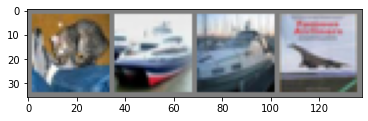

  cat  ship  ship plane


In [17]:
#预测
dataiter=iter(testloader)
images,labels=next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [18]:
outputs = net(images)
_, predicted = torch.max(outputs, 1) #torch.topk(1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    dog  ship  ship  ship


In [19]:
correct = 0
total = 0
with torch.no_grad(): 
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [20]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 49 %
Accuracy of   car : 64 %
Accuracy of  bird : 32 %
Accuracy of   cat : 25 %
Accuracy of  beer : 37 %
Accuracy of   dog : 61 %
Accuracy of  frog : 65 %
Accuracy of horse : 64 %
Accuracy of  ship : 68 %
Accuracy of truck : 73 %
